In [9]:
import numpy as np


from plot_utils import *


# Euler-Maruyama

In [10]:
def brownian_noise(m):
    return np.random.randn(m)

def euler_maruyama_sde_01(x, t, δt):
    m = x.shape[1]

    Xt = x[0, :]
    Yt = x[1, :]
    Zt = x[2, :]

    dUt = brownian_noise(m)
    dVt = brownian_noise(m)
    dWt = brownian_noise(m)

    dXt = δt * 10*(Yt - Xt)          + np.sqrt(δt) * dUt
    dYt = δt * (Xt * (28 - Zt) - Yt) + np.sqrt(δt) * dVt
    dZt = δt * (Xt * Yt - 8/3 * Zt)  + np.sqrt(δt) * dWt
    return np.array([Xt+dXt, Yt+dYt, Zt+dZt])

def simulate_em_sde01(tmax, δt, m=3):
    t = np.arange(0, tmax, δt)

    x0            = np.array([[-5.91652, -5.52332, 24.57231]]).T * np.ones((1, m))
    xsim          = np.full((3, m, len(t)), np.nan)
    xsim[:, :, 0] = x0

    for i, ti in enumerate(t[1:]):
        xsim[:, :, i+1] = euler_maruyama_sde_01(xsim[:,:,i], ti, ti-t[i])

    return t, xsim

/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_30932/4080216186.py:16: RuntimeWarning: overflow encountered in multiply
  dYt = δt * (Xt * (28 - Zt) - Yt) + np.sqrt(δt) * dVt
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_30932/4080216186.py:17: RuntimeWarning: overflow encountered in multiply
  dZt = δt * (Xt * Yt - 8/3 * Zt)  + np.sqrt(δt) * dWt
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_30932/4080216186.py:16: RuntimeWarning: invalid value encountered in subtract
  dYt = δt * (Xt * (28 - Zt) - Yt) + np.sqrt(δt) * dVt
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_30932/4080216186.py:18: RuntimeWarning: invalid value encountered in add
  return np.array([Xt+dXt, Yt+dYt, Zt+dZt])
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_30932/4080216186.py:17: RuntimeWarning: invalid value encountered in subtract
  dZt = δt * (Xt * Yt - 8/3 * Zt)  + np.sqrt(δt) * dWt


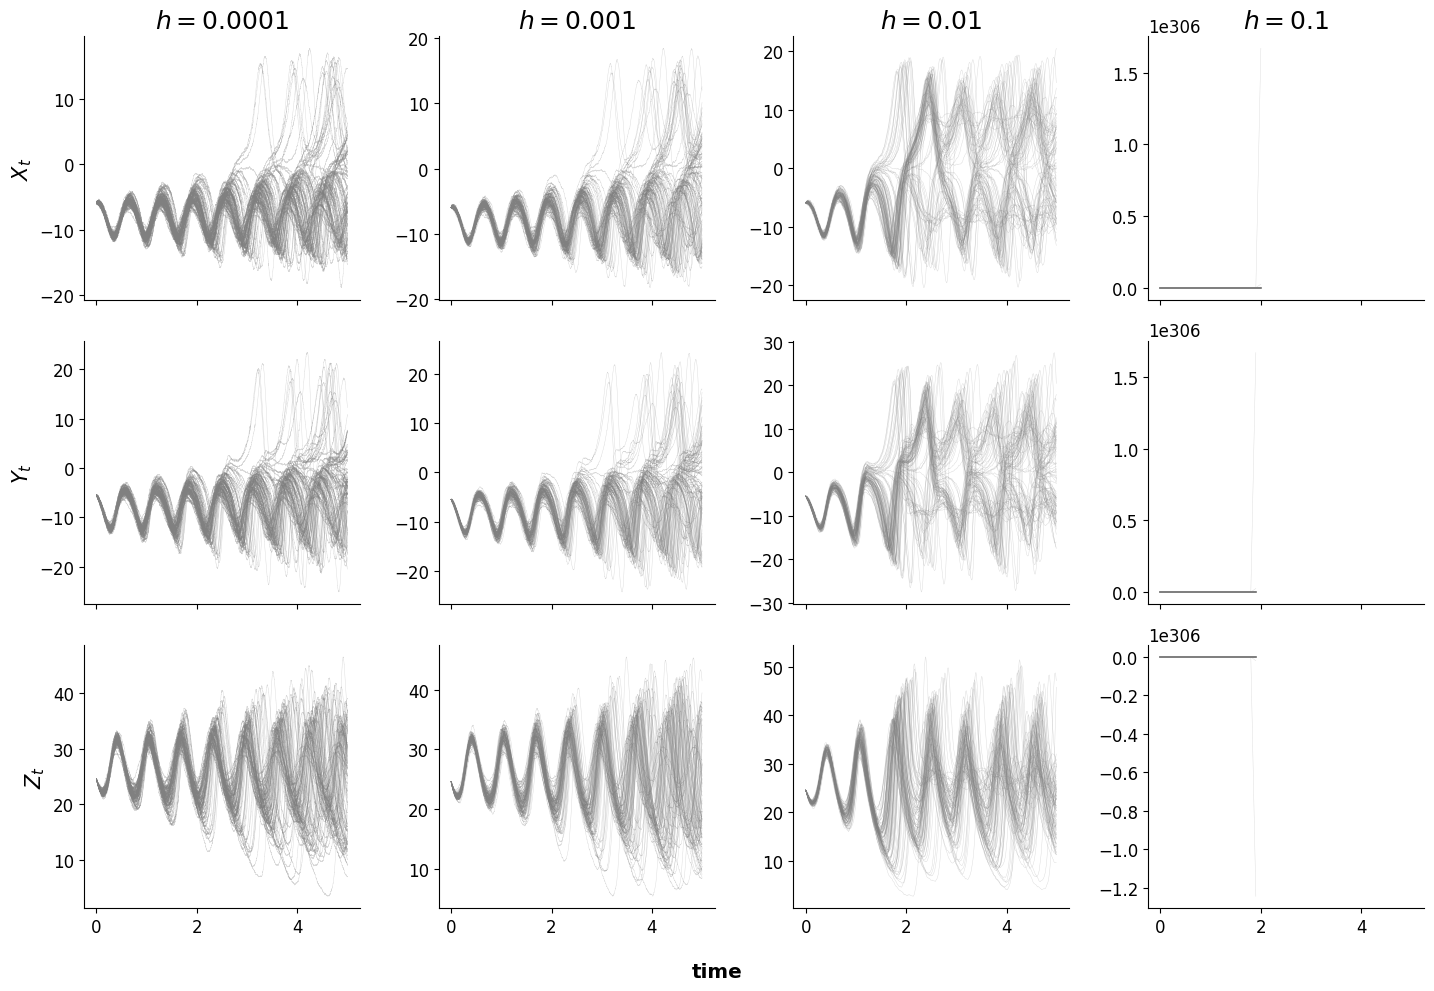

In [11]:
tmax     = 5
num_sims = 100

t1, xsim1 = simulate_em_sde01(tmax, 0.0001, m=num_sims)
t2, xsim2 = simulate_em_sde01(tmax, 0.001,  m=num_sims)
t3, xsim3 = simulate_em_sde01(tmax, 0.01,   m=num_sims)
t4, xsim4 = simulate_em_sde01(tmax, 0.1,    m=num_sims)

fig, ax = plt.subplots(3, 4, figsize=(14.5, 10), sharex=True)
ax[0, 0].plot(t1, xsim1[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 0].plot(t1, xsim1[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 0].plot(t1, xsim1[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 1].plot(t2, xsim2[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 1].plot(t2, xsim2[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 1].plot(t2, xsim2[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 2].plot(t3, xsim3[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 2].plot(t3, xsim3[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 2].plot(t3, xsim3[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 3].plot(t4, xsim4[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 3].plot(t4, xsim4[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 3].plot(t4, xsim4[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 0].set_ylabel(r'$X_t$')
ax[1, 0].set_ylabel(r'$Y_t$')
ax[2, 0].set_ylabel(r'$Z_t$')

for i, h in enumerate([0.0001, 0.001, 0.01, 0.1]):
    ax[0, i].set_title(f'$h = {h}$')

# despine
for axi in ax.flatten():
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

fig.supxlabel('time', weight='bold')
plt.tight_layout()

In [12]:
def xi_second_scheme(δt, m):
    xis   = [np.sqrt(3*δt), -np.sqrt(3*δt), 0]
    probs = [1/3, 1/3, 1/3]
    return np.random.choice(xis, size=m, p=probs)

#def euler_maruyama_sde_01(x, t, δt):
def second_scheme_sde_01(x, t, δt):
    m = x.shape[1]

    Xt = x[0, :]
    Yt = x[1, :]
    Zt = x[2, :]

    dUt = brownian_noise(m)
    dVt = brownian_noise(m)
    dWt = brownian_noise(m)

    f = 10 * (Yt - Xt)
    g = Xt * (28 - Zt) - Yt
    h = Xt * Yt - 8/3 * Zt

    fx  = -10
    fxx = 0

    gy  = 0
    gyy = 0

    hz  = -8/3
    hzz = 0

    xi_x = xi_second_scheme(δt, m)
    xi_y = xi_second_scheme(δt, m)
    xi_z = xi_second_scheme(δt, m)

    dXt = δt*f + xi_x*dUt + 0.5*δt*xi_x*(fx*dUt) + 0.5*δt**2*(f*fx + 0.5*fxx*dUt**2 )
    dYt = δt*g + xi_y*dVt + 0.5*δt*xi_y*(gy*dVt) + 0.5*δt**2*(g*gy + 0.5*gyy*dVt**2 )
    dZt = δt*h + xi_z*dWt + 0.5*δt*xi_z*(hz*dWt) + 0.5*δt**2*(h*hz + 0.5*hzz*dWt**2 )

    return np.array([Xt+dXt, Yt+dYt, Zt+dZt])

def simulate_second_scheme_sde01(tmax, δt, m=3):
    t = np.arange(0, tmax, δt)

    x0            = np.array([[-5.91652, -5.52332, 24.57231]]).T * np.ones((1, m))
    xsim          = np.full((3, m, len(t)), np.nan)
    xsim[:, :, 0] = x0

    for i, ti in enumerate(t[1:]):
        xsim[:, :, i+1] = second_scheme_sde_01(xsim[:,:,i], ti, ti-t[i])

    return t, xsim


/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_30932/799719206.py:19: RuntimeWarning: overflow encountered in multiply
  g = Xt * (28 - Zt) - Yt
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_30932/799719206.py:20: RuntimeWarning: overflow encountered in multiply
  h = Xt * Yt - 8/3 * Zt
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_30932/799719206.py:36: RuntimeWarning: invalid value encountered in multiply
  dYt = δt*g + xi_y*dVt + 0.5*δt*xi_y*(gy*dVt) + 0.5*δt**2*(g*gy+0.5*gyy*dVt**2 )
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_30932/799719206.py:37: RuntimeWarning: invalid value encountered in add
  dZt = δt*h + xi_z*dWt + 0.5*δt*xi_z*(hz*dWt) + 0.5*δt**2*(h*hz+0.5*hzz*dWt**2 )


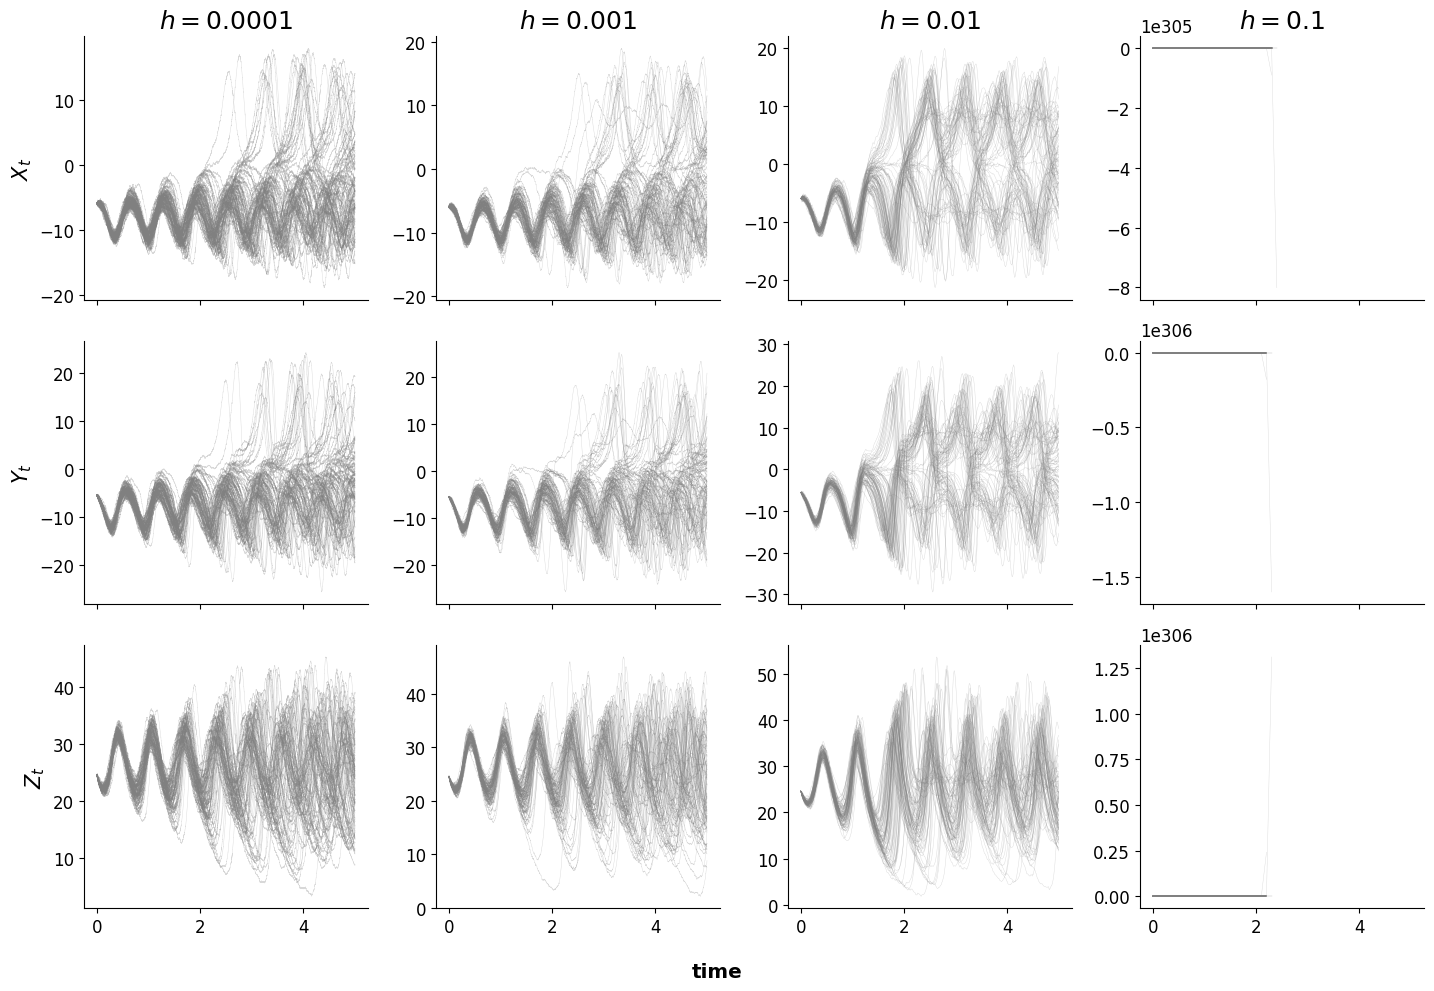

In [13]:
tmax     = 5
num_sims = 100


t1, xsim1 = simulate_second_scheme_sde01(tmax, 0.0001, m=num_sims)
t2, xsim2 = simulate_second_scheme_sde01(tmax, 0.001,  m=num_sims)
t3, xsim3 = simulate_second_scheme_sde01(tmax, 0.01,   m=num_sims)
t4, xsim4 = simulate_second_scheme_sde01(tmax, 0.1,    m=num_sims)

fig, ax = plt.subplots(3, 4, figsize=(14.5, 10), sharex=True)
ax[0, 0].plot(t1, xsim1[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 0].plot(t1, xsim1[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 0].plot(t1, xsim1[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 1].plot(t2, xsim2[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 1].plot(t2, xsim2[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 1].plot(t2, xsim2[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 2].plot(t3, xsim3[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 2].plot(t3, xsim3[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 2].plot(t3, xsim3[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 3].plot(t4, xsim4[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 3].plot(t4, xsim4[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 3].plot(t4, xsim4[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 0].set_ylabel(r'$X_t$')
ax[1, 0].set_ylabel(r'$Y_t$')
ax[2, 0].set_ylabel(r'$Z_t$')

for i, h in enumerate([0.0001, 0.001, 0.01, 0.1]):
    ax[0, i].set_title(f'$h = {h}$')

# despine
for axi in ax.flatten():
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

fig.supxlabel('time', weight='bold')
plt.tight_layout()

In [ ]:
def rk_book(x, f, σ, δt):
    m = x.shape[1]
    n = x.shape[0]

    Xt = x[0, :]
    Yt = x[1, :]
    Zt = x[2, :]

    Yx = [x + δt*fi(xi) + σ(xi) for fi, xi in zip(f, x)]

    dx = 0.5*δt*() +

def third_scheme_sde_01(x, t, δt):
    m = x.shape[1]

    Xt = x[0, :]
    Yt = x[1, :]
    Zt = x[2, :]

    dUt = brownian_noise(m)
    dVt = brownian_noise(m)
    dWt = brownian_noise(m)